<center><div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 18px;"> &nbsp; Some considerations about MeriSkill internship project 2: “Diabetes Patients" &nbsp; </b>
    <br><br>
    <b>This project have a dataset  from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2.
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome). All the executed methods are shown below. The Principal Components Analysis was a little better than the other methods, that is why is better documented here!<br style="margin: 15px;"><b>The transformation of $X^2$ give the better results in the form of an almost linear dependence.
    </b>
    <br><br>
    
    
<br>
    
</div></center>


In [1]:
#!pip list --outdated  | grep -v '^\-e' | cut -d = -f 1  | xargs -n1 pip install -U

#This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
from sklearn.model_selection import train_test_split
import math

# From now on, are the routines I will use in all the notebook [GGA]
from sklearn.preprocessing import StandardScaler # data scaling, used by Linear regression(optional), PCA and PLS (better if), etc.
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/mskill/Meriskill.db
/kaggle/input/tnsname/tnsnames.ora


In [2]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [3]:
def select_all_clean(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute(""" SELECT DISTINCT Pregnancies, Glucose, BloodPressure, SkinThickness, 
                    Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
                    FROM Task2
                    WHERE Pregnancies IS NOT NULL
                       AND Glucose IS NOT NULL
                       AND BloodPressure IS NOT NULL
                       AND SkinThickness IS NOT NULL
                       AND Insulin IS NOT NULL
                       AND BMI IS NOT NULL
                       AND  DiabetesPedigreeFunction IS NOT NULL
                       AND Age IS NOT NULL
                       AND Outcome IS NOT NULL;    
                """ )

    rows = cur.fetchall()
   
    return rows

In [4]:
connect = create_connection('/kaggle/input/mskill/Meriskill.db')
rows = select_all_clean(connect)

Res =[]
for row in rows:
    res = []
    for ele in row:
        temp = float(ele) 
        res.append((temp))
    Res.append(res)
    
df = pd.DataFrame(Res, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                    'Insulin', 'BMI', 'DiabPedigFunct', 'Age', 'Outcome'])
df = df.dropna(how='any',axis =0)

# At the beginning I have made a double cleaning procedure, the first one in sqlite and then here
# but finally I have droped the pandas .dropna() and .drop_duplicates

DPF = df['DiabPedigFunct']
print(DPF)
descrip = df

X_train, X_test, _, _ = train_test_split (descrip, DPF,test_size =0.2)

print (descrip)

features = list (descrip.columns)
features.remove ('DiabPedigFunct')
print ("Features analyzed: ",features)


0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabPedigFunct, Length: 768, dtype: float64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  3

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#x = descrip.loc[:, features].values
x = descrip[features].values
x = StandardScaler().fit_transform(x)
print("\n \t mean, \t    sigma")
print (np.mean(x),np.std(x),"\n") # testing if media=0 and sigma=1
cov = np.cov(x.T)
eig_values, eig_vectors = np.linalg.eig(cov)

print ("Covariance = ",cov)
print ("Eigenvalues = ", eig_values)
print ("Eigenvectors = ", eig_vectors)


 	 mean, 	    sigma
6.722053469410127e-17 1.0 

Covariance =  [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
   0.54505093  0.22218746]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.26385788  0.46718972]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.23984024  0.06515319]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
  -0.11411885  0.07484969]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
  -0.04221793  0.13071816]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.03628912  0.29307627]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   1.00130378  0.23866675]
 [ 0.22218746  0.46718972  0.06515319  0.07484969  0.13071816  0.29307627
   0.23866675  1.00130378]]
Eigenvalues =  [2.27746204 1.74562013 1.09930959 0.84688435 0.74087859 0.38656369
 0.42314573 0.49056612]
Eigenvectors =  [[-0.262

0 ------------------------------------
				!!!!!!!!!!!!!! DATA = X !!!!!!!!!!!!!
-----------------------------------------------
HEAD -- x 
    Princ. Comp1  Princ. Comp2
0     -1.760171     -1.031423
1      1.496059      0.473336
2     -0.646636     -2.035077
3      1.485585      1.088819
4     -1.080577      1.512194

 TAIL -- x 
      Princ. Comp1  Princ. Comp2
763     -1.621501     -0.868917
764      0.459708      0.722564
765      0.421683      0.047592
766      0.018945     -1.317721
767      1.308475      0.998619
Explained variation per principal component: [0.28431207 0.2179184 ]
Orthogonality (0.0 means perfect orthogonality) =  -3.121529044418649
Variables used:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

-------------------------THE COMPONENTS START HERE .T
 [[-0.3959818  -0.66623439]
 [-0.68205697 -0.06698742]
 [-0.48478366  0.00566039]
 [-0.42671658  0.64932605]
 [-0.47755503  0.521

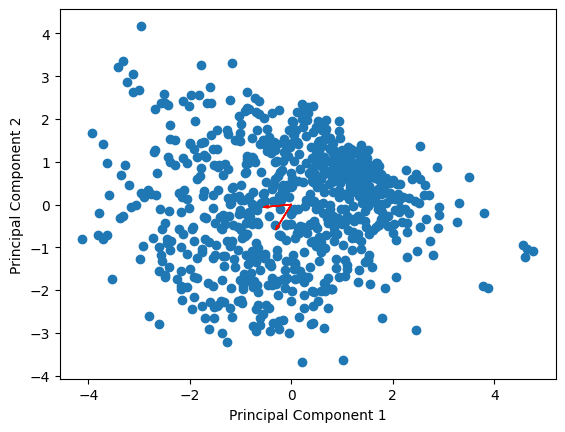

Are Eigenvectors orthogonals? -->  False
Are Components orthogonals? -->  False

1---------------------------------!!!!!!!!!!!!!!
				 DATA = X*X 
!!!!!!!!!!!!!-----------------------------------------------------
HEAD -- x*x 
    Princ. Comp1  Princ. Comp2
0     -0.070989     -1.430826
1     -0.167557     -1.281206
2      0.027559     -0.665227
3     -0.566607     -1.544786
4     -0.968200      1.389415

 TAIL -- x*x  
      Princ. Comp1  Princ. Comp2
763      0.182265     -1.044667
764     -0.284587     -1.386310
765     -0.695006     -1.415751
766     -0.254005     -1.216550
767     -0.140808     -1.512863
Orthogonality (0.0 means perfect orthogonality) =  1.8450778646609596
Explained variation per principal component: [0.30378079 0.27176483]
Variables used:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

-------------------------THE COMPONENTS START HERE .T
 [[-0.06171374  0.05894792]
 [ 0.377215

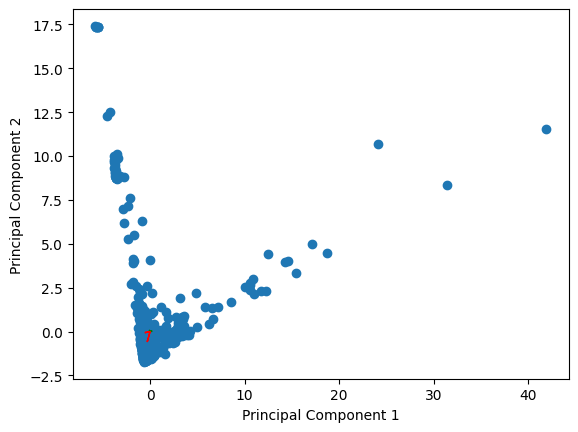

Are Eigenvectors orthogonals? -->  False
Are Components orthogonals? -->  False

2 -------------------------------!!!!!!!!!!!!!
				 DATA = |X| 
!!!!!!!!!!!!!!-----------------------------------------------------
HEAD -- sqrt x 
    Princ. Comp1  Princ. Comp2
0     -0.337898      0.290997
1     -0.269027      0.172536
2      0.115197      0.473818
3     -0.453555      0.032004
4      0.590014     -0.290241

 TAIL -- sqrt x 
      Princ. Comp1  Princ. Comp2
763      0.049160      0.381532
764     -0.460388     -0.442434
765     -0.492783     -0.821421
766     -0.037803     -0.187060
767     -0.520040      0.257712
Explained variation per principal components: [0.2231078  0.16404379]
Variables used:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

-------------------------Orthogonality (0.0 means perfect orthogonality) =  0.1411113236904856

-------------------------THE COMPONENTS START HERE .T
 [[ 0.10

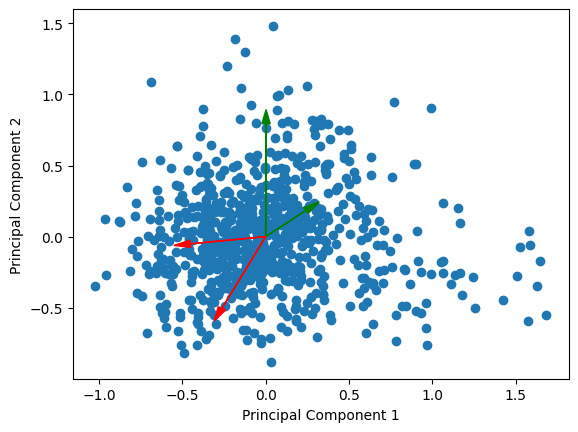

Are Eigenvectors orthogonals? -->  False
Are Components orthogonals? -->  False

3 ---------------------------!!!!!!!!!!!!!!
				 DATA = 1/X 
!!!!!!!!!!!!!--------------------------------------------------------------
HEAD -- 1/x 
    Princ. Comp1  Princ. Comp2
0    -13.235763     -0.868727
1    -19.580552     -2.892999
2    -19.020312     -1.345087
3    -20.165394     -3.167856
4    -17.382964      1.365989

 TAIL -- 1/x 
      Princ. Comp1  Princ. Comp2
763     -9.458959     -3.698891
764    -16.517301     27.126111
765    -19.324253    300.844090
766    -22.293185      4.113924
767    -23.119790     -2.929629
Explained variation per principal component: [0.94547708 0.03825218]
Orthogonality (0.0 means perfect orthogonality) =  261.67676068572

-------------------------THE COMPONENTS START HERE .T
 [[ 4.74818251e-01 -1.67584130e-01]
 [ 7.81371734e-02  2.75830595e+01]
 [-2.40281879e-01  3.39346971e-01]
 [ 1.03589644e-01  4.15354886e-02]
 [-3.04684543e-01 -1.13784076e-01]
 [ 1.37209379

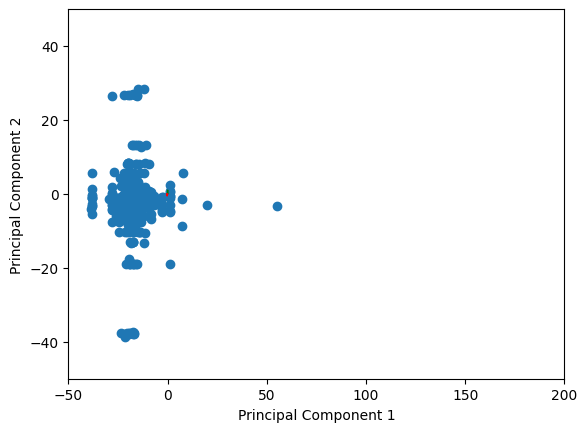

Are Eigenvectors orthogonals? -->  False
Are Components orthogonals? -->  False

 4 -----------------------------!!!!!!!!!!!! 
				 DATA = ln 
 X !!!!!!!!!!!!!!!------------------------------------------------------------
HEAD log x 
    Princ. Comp1  Princ. Comp2
0     -0.210008     -0.492133
1     -0.848784     -2.145170
2      0.897882     -1.079150
3     -0.860884      2.292034
4      0.489678     -0.167672

 TAIL tanh x 
     Princ. Comp1  Princ. Comp2
19      0.240641      0.075519
20     -0.494723     -0.666728
21     -0.168117      0.362854
22     -0.381325     -0.894180
23     -0.699155      0.685281
Explained variation per principal component: [0.39581461 0.22166352]
Orthogonality (0.0 means perfect orthogonality) =  1.2339618911481864

-------------------------THE COMPONENTS START HERE .T
 [[-0.30051444  0.13132603]
 [ 0.01587211 -0.20681744]
 [ 0.18115337 -0.73364993]
 [-0.24724962  0.39357806]
 [ 0.05827302 -0.56519969]
 [-1.48608264 -0.25431748]
 [ 0.15427585 -0.46694098]

/tmp/ipykernel_26/3883206957.py:124: RuntimeWarning: invalid value encountered in log
  principalComponents = pca_descrip.fit_transform(pd.DataFrame(np.log(x)).dropna())


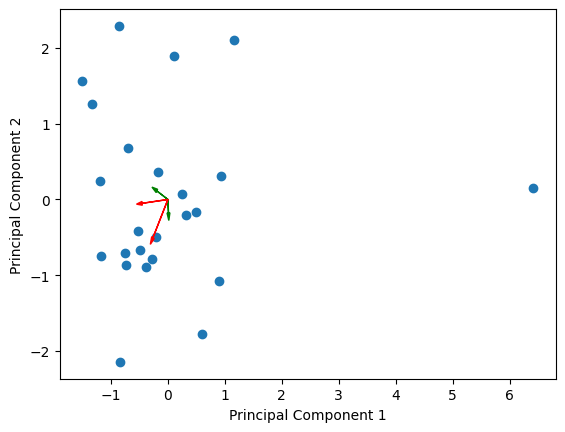


5 -----------------------------!!!!!!!!!!!!
				  DATA = tanh X 
!!!!!!!!!!!!!!!------------------------------------------------------------
HEAD tanh x 
    Princ. Comp1  Princ. Comp2
0      1.614611      0.318459
1     -1.111508     -0.142899
2      0.711914      1.326095
3     -1.237425     -0.528282
4      0.814848     -1.378761

 TAIL tanh x 
      Princ. Comp1  Princ. Comp2
763      0.703733     -0.096681
764     -0.421568     -0.512076
765     -0.291285      0.044571
766      0.343394      0.902665
767     -1.090424     -0.521007
Explained variation per principal component: [0.31097508 0.23537865]
Orthogonality (0.0 means perfect orthogonality) =  -1.840161730261464
Variables used:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

-------------------------THE COMPONENTS START HERE .T
 [[ 0.34794313  0.35489854]
 [ 0.42208746 -0.04168905]
 [ 0.23548007  0.01540561]
 [ 0.18355278 -0.52889558]
 [ 

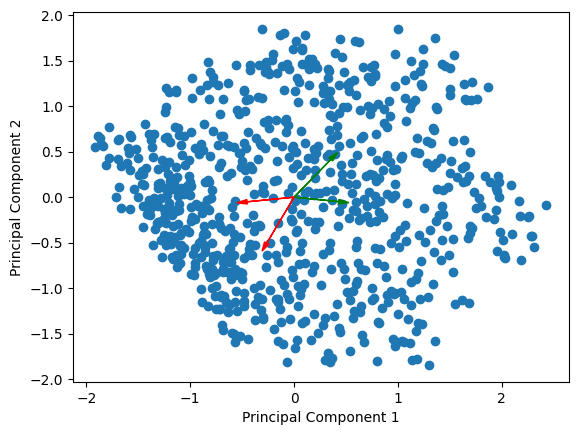

Are Eigenvectors orthogonals? -->  False
Are Components orthogonals? -->  False


In [6]:
print ("0 ------------------------------------\n\t\t\t\t!!!!!!!!!!!!!! DATA = X !!!!!!!!!!!!!\n-----------------------------------------------")
pca_descrip = PCA(n_components=2)
principalComponents = pca_descrip.fit_transform(x)
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2"])
print ("HEAD -- x \n",principal_Df.head())
print ("\n TAIL -- x \n",principal_Df.tail())

print('Explained variation per principal component: {}'.format(pca_descrip.explained_variance_ratio_))
print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot( principalComponents [0] , principalComponents [1] ))
# THE COMPONENTS HERE
print ("Variables used: ", descrip[features].columns)
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
   # Plot the eigenvectors
    # Beware! Eigenvectors are oriented in rows in sklearn PCA and column-oriented in np.linalg.eig()!
for i in range(2):
    plt.arrow(0, 0, pca_descrip.components_[0, i], pca_descrip.components_[1, i], color="g",
                  head_width=0.05, head_length=0.1)

for i in range(2):
    plt.arrow(0, 0, eig_vectors[i, 0], eig_vectors[i, 1], color="r",
                  head_width=0.05, head_length=0.1)
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.show()

print( "Are Eigenvectors orthogonals? --> " ,np.dot(eig_vectors[:, 0], eig_vectors[:, 1]) == 0)    # yields True
print("Are Components orthogonals? --> " ,np.dot(pca_descrip.components_[0, :], pca_descrip.components_[1, :]) == 0)    # yields True

print ("\n1---------------------------------!!!!!!!!!!!!!!\n\t\t\t\t DATA = X*X \n!!!!!!!!!!!!!-----------------------------------------------------")
principalComponents = pca_descrip.fit_transform(x*x)
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2"])

print ("HEAD -- x*x \n",principal_Df.head())
print ("\n TAIL -- x*x  \n",principal_Df.tail())

print ("Orthogonality (0.0 means perfect orthogonality) = ",np.dot(principalComponents [0] , principalComponents [1] ))
print('Explained variation per principal component: {}'.format(pca_descrip.explained_variance_ratio_))
# THE COMPONENTS HERE
print ("Variables used: ", descrip[features].columns)
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
   # Plot the eigenvectors
    # Beware! Eigenvectors are oriented in rows in sklearn PCA and column-oriented in np.linalg.eig()!
for i in range(2):
    plt.arrow(0, 0, pca_descrip.components_[0, i], pca_descrip.components_[1, i], color="g",
                  head_width=0.05, head_length=0.1)

for i in range(2):
    plt.arrow(0, 0, eig_vectors[i, 0], eig_vectors[i, 1], color="r",
                  head_width=0.05, head_length=0.1)
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.show()

print( "Are Eigenvectors orthogonals? --> " ,np.dot(eig_vectors[:, 0], eig_vectors[:, 1]) == 0)    # yields True
print("Are Components orthogonals? --> " ,np.dot(pca_descrip.components_[0, :], pca_descrip.components_[1, :]) == 0)    # yields True

print ("\n2 -------------------------------!!!!!!!!!!!!!\n\t\t\t\t DATA = |X| \n!!!!!!!!!!!!!!-----------------------------------------------------")
principalComponents = pca_descrip.fit_transform(np.sqrt(abs(x)))
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2"])


print ("HEAD -- sqrt x \n",principal_Df.head())
print ("\n TAIL -- sqrt x \n",principal_Df.tail())

print('Explained variation per principal components: {}'.format(pca_descrip.explained_variance_ratio_))
print ("Variables used: ", descrip[features].columns)
print ("\n-------------------------Orthogonality (0.0 means perfect orthogonality) = ", np.dot (principalComponents [0] , principalComponents [1] ))
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
   # Plot the eigenvectors
    # Beware! Eigenvectors are oriented in rows in sklearn PCA and column-oriented in np.linalg.eig()!
for i in range(2):
    plt.arrow(0, 0, pca_descrip.components_[0, i], pca_descrip.components_[1, i], color="g",
                  head_width=0.05, head_length=0.1)

for i in range(2):
    plt.arrow(0, 0, eig_vectors[i, 0], eig_vectors[i, 1], color="r",
                  head_width=0.05, head_length=0.1)
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.show()

print( "Are Eigenvectors orthogonals? --> " ,np.dot(eig_vectors[:, 0], eig_vectors[:, 1]) == 0)    # yields True
print("Are Components orthogonals? --> " ,np.dot(pca_descrip.components_[0, :], pca_descrip.components_[1, :]) == 0)    # yields True

print ("\n3 ---------------------------!!!!!!!!!!!!!!\n\t\t\t\t DATA = 1/X \n!!!!!!!!!!!!!--------------------------------------------------------------")
principalComponents = pca_descrip.fit_transform(1/x)
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2"])

print ("HEAD -- 1/x \n",principal_Df.head())
print ("\n TAIL -- 1/x \n",principal_Df.tail())
print('Explained variation per principal component: {}'.format(pca_descrip.explained_variance_ratio_))
print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot( principalComponents [0] , principalComponents [1] ))
# THE COMPONENTS HERE
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.xlim(-50, 200)
plt.ylim(-50, 50)   # Plot the eigenvectors
    # Beware! Eigenvectors are oriented in rows in sklearn PCA and column-oriented in np.linalg.eig()!
for i in range(2):
    plt.arrow(0, 0, pca_descrip.components_[0, i], pca_descrip.components_[1, i], color="g",
                  head_width=0.05, head_length=0.1)

for i in range(2):
    plt.arrow(0, 0, eig_vectors[i, 0], eig_vectors[i, 1], color="r",
                  head_width=0.05, head_length=0.1)
plt.show()

print( "Are Eigenvectors orthogonals? --> " ,np.dot(eig_vectors[:, 0], eig_vectors[:, 1]) == 0)    # yields True
print("Are Components orthogonals? --> " ,np.dot(pca_descrip.components_[0, :], pca_descrip.components_[1, :]) == 0)    # yields True
print ("\n 4 -----------------------------!!!!!!!!!!!! \n\t\t\t\t DATA = ln \n X !!!!!!!!!!!!!!!------------------------------------------------------------")
principalComponents = pca_descrip.fit_transform(pd.DataFrame(np.log(x)).dropna())
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2"])


print ("HEAD log x \n",principal_Df.head())
print ("\n TAIL tanh x \n",principal_Df.tail())

print('Explained variation per principal component: {}'.format(pca_descrip.explained_variance_ratio_))
print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot (principalComponents [0] , principalComponents [1] ))
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
   # Plot the eigenvectors
    # Beware! Eigenvectors are oriented in rows in sklearn PCA and column-oriented in np.linalg.eig()!
for i in range(2):
    plt.arrow(0, 0, pca_descrip.components_[0, i], pca_descrip.components_[1, i], color="g",
                  head_width=0.05, head_length=0.1)

for i in range(2):
    plt.arrow(0, 0, eig_vectors[i, 0], eig_vectors[i, 1], color="r",
                  head_width=0.05, head_length=0.1)
plt.show()

print ("\n5 -----------------------------!!!!!!!!!!!!\n\t\t\t\t  DATA = tanh X \n!!!!!!!!!!!!!!!------------------------------------------------------------")
principalComponents = pca_descrip.fit_transform(np.tanh(x))
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2"])


print ("HEAD tanh x \n",principal_Df.head())
print ("\n TAIL tanh x \n",principal_Df.tail())

print('Explained variation per principal component: {}'.format(pca_descrip.explained_variance_ratio_))
print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot (principalComponents [0] , principalComponents [1] ))
print ("Variables used: ", descrip[features].columns)
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
   # Plot the eigenvectors
    # Beware! Eigenvectors are oriented in rows in sklearn PCA and column-oriented in np.linalg.eig()!
for i in range(2):
    plt.arrow(0, 0, pca_descrip.components_[0, i], pca_descrip.components_[1, i], color="g",
                  head_width=0.05, head_length=0.1)

for i in range(2):
    plt.arrow(0, 0, eig_vectors[i, 0], eig_vectors[i, 1], color="r",
                  head_width=0.05, head_length=0.1)
plt.show()
print( "Are Eigenvectors orthogonals? --> " ,np.dot(eig_vectors[:, 0], eig_vectors[:, 1]) == 0)    # yields True
print("Are Components orthogonals? --> " ,np.dot(pca_descrip.components_[0, :], pca_descrip.components_[1, :]) == 0)    # yields True


0 ------------------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!-----------------------------------------------
HEAD -- x 
    Princ. Comp1  Princ. Comp2  Princ. Comp3
0     -1.760171     -1.031423      0.106570
1      1.496059      0.473336     -0.683214
2     -0.646636     -2.035077      1.846747
3      1.485585      1.088819     -0.258629
4     -1.080577      1.512194      1.611675

 TAIL -- x 
      Princ. Comp1  Princ. Comp2  Princ. Comp3
763     -1.621501     -0.868917     -1.885498
764      0.459708      0.722564     -0.506022
765      0.421683      0.047592     -0.261162
766      0.018945     -1.317721      1.168693
767      1.308475      0.998619     -0.715453


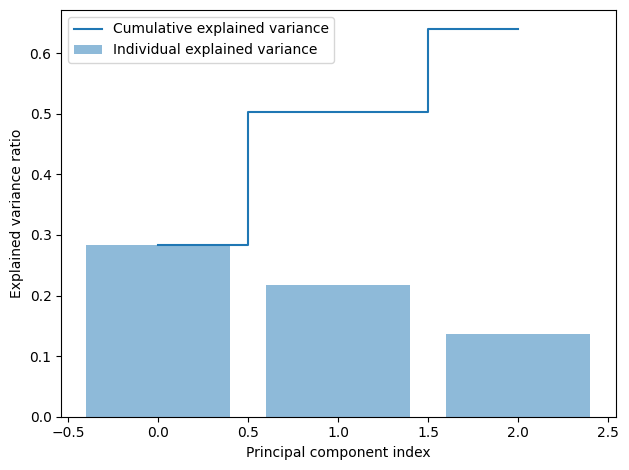

Orthogonality (0.0 means perfect orthogonality) =  -3.1943391149969935
Variables:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabPedigFunct', 'Age', 'Outcome'],
      dtype='object')

-------------------------THE COMPONENTS START HERE .T
 [[-0.3959818  -0.66623439 -0.20197113]
 [-0.68205697 -0.06698742  0.48503395]
 [-0.48478366  0.00566039 -0.65237943]
 [-0.42671658  0.64932605 -0.27577418]
 [-0.47755503  0.52194508  0.21516564]
 [-0.59860885  0.35210683 -0.21143122]
 [-0.48504654 -0.67332654 -0.17075435]
 [-0.64551919 -0.16072858  0.44883465]] 
-------------------------THE COMPONENTS FINISH HERE-----------------------



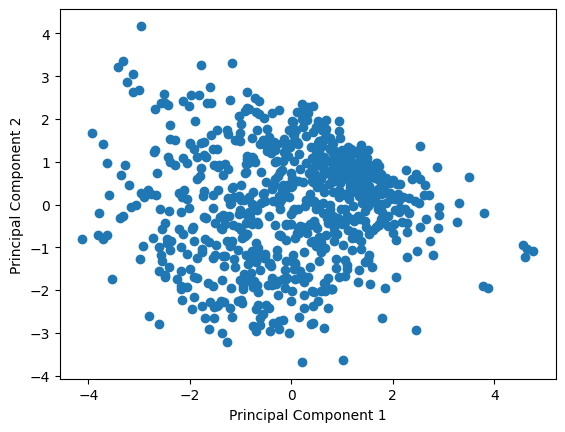

1---------------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!-----------------------------------------------------
HEAD -- x*x 
    Princ. Comp1  Princ. Comp2  Princ. Comp3
0     -0.070989     -1.430826     -0.173077
1     -0.167557     -1.281206     -0.027530
2      0.027559     -0.665227      0.631969
3     -0.566607     -1.544786     -0.105972
4     -0.968200      1.389415      0.030858

 TAIL -- x*x  
      Princ. Comp1  Princ. Comp2  Princ. Comp3
763      0.182265     -1.044667      0.332485
764     -0.284587     -1.386310     -0.079628
765     -0.695006     -1.415751      0.035579
766     -0.254005     -1.216550     -0.285353
767     -0.140808     -1.512863     -0.289994
Orthogonality (0.0 means perfect orthogonality) =  1.849842652397204


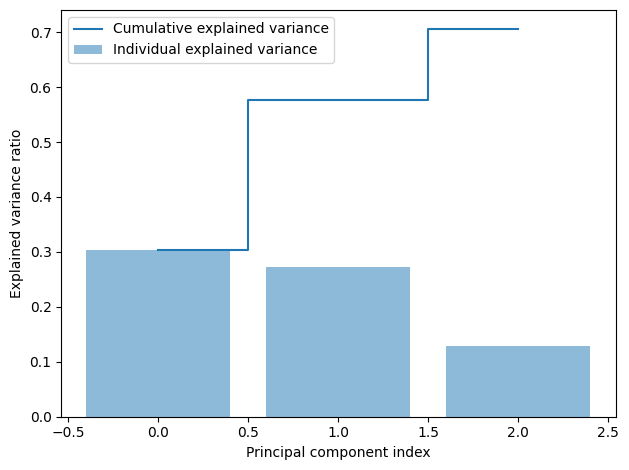

Variables:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabPedigFunct', 'Age', 'Outcome'],
      dtype='object')

-------------------------THE COMPONENTS START HERE .T
 [[-6.17137361e-02  5.89479184e-02  7.73806786e-03]
 [ 3.77215393e-01  5.03796493e-02  1.84535891e-03]
 [-8.05730979e-01  2.30698575e+00 -1.07989215e+00]
 [-3.97715646e-02  2.12316522e-01  1.14776396e-01]
 [ 2.89971835e+00  8.44193734e-01 -7.74566230e-02]
 [-3.98295958e-01  1.51761280e+00  1.66486535e+00]
 [ 1.20435921e-01  3.57086248e-02  2.01010176e-01]
 [ 6.76057144e-02  6.09762531e-02 -3.33343058e-02]] 
-------------------------THE COMPONENTS FINISH HERE-----------------------



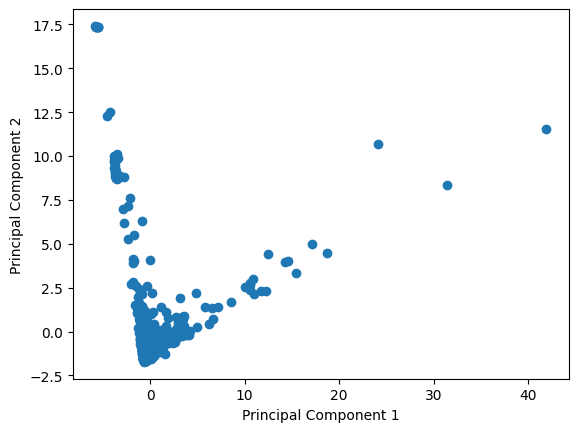

2 -------------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!-----------------------------------------------------
HEAD -- sqrt x 
    Princ. Comp1  Princ. Comp2  Princ. Comp3
0     -0.337898      0.290997     -0.069088
1     -0.269027      0.172536     -0.001048
2      0.115197      0.473818      0.060925
3     -0.453555      0.032004     -0.420323
4      0.590014     -0.290241      0.271547

 TAIL -- sqrt x 
      Princ. Comp1  Princ. Comp2  Princ. Comp3
763      0.049160      0.381532     -0.367921
764     -0.460388     -0.442434     -0.254651
765     -0.492783     -0.821421     -0.199051
766     -0.037803     -0.187060     -0.034826
767     -0.520040      0.257712     -0.151245


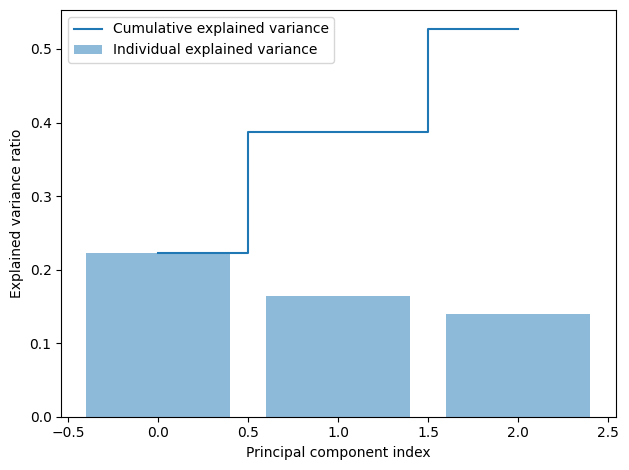

Orthogonality (0.0 means perfect orthogonality) =  0.1411837335271119

-------------------------THE COMPONENTS START HERE .T
 [[ 0.10318584  0.06752133 -0.19374041]
 [ 0.00092021  0.29046451  0.05986769]
 [ 0.29102282 -0.08713419  0.14463324]
 [ 0.14242514  0.02770092  0.0641991 ]
 [ 0.0675362   0.1643207   0.10401936]
 [ 0.24267879 -0.01021248 -0.12817763]
 [ 0.0543748   0.09130451 -0.14088154]
 [ 0.01639637  0.03624513  0.02697942]] 
-------------------------THE COMPONENTS FINISH HERE-----------------------



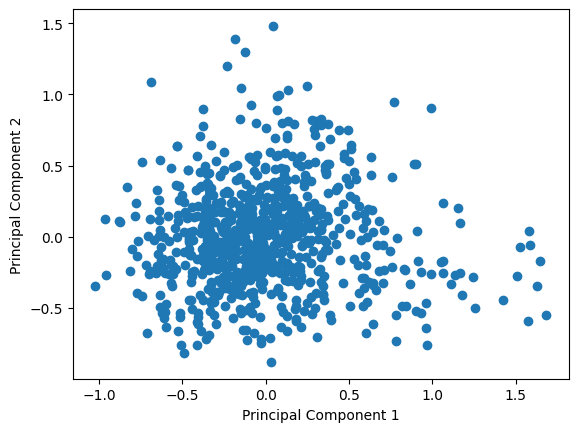

3 ---------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!--------------------------------------------------------------
HEAD -- 1/x 
    Princ. Comp1  Princ. Comp2  Princ. Comp3
0    -13.235763     -0.868727      0.762138
1    -19.580552     -2.892999      0.561674
2    -19.020312     -1.345087      0.076638
3    -20.165394     -3.167856     -8.471783
4    -17.382964      1.365989     -5.622564

 TAIL -- 1/x 
      Princ. Comp1  Princ. Comp2  Princ. Comp3
763     -9.458959     -3.698891     -1.795870
764    -16.517301     27.126111      0.444885
765    -19.324253    300.844090     -4.928919
766    -22.293185      4.113924      0.876943
767    -23.119790     -2.929629      0.525473


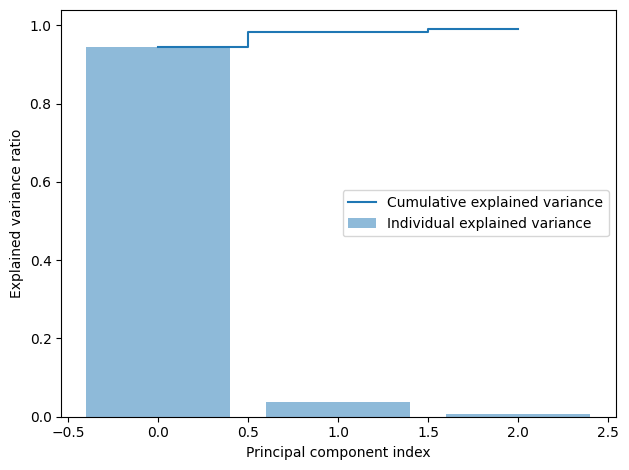

Orthogonality (0.0 means perfect orthogonality) =  262.10483393265577

-------------------------THE COMPONENTS START HERE .T
 [[ 4.74818251e-01 -1.67584130e-01 -1.88224943e-01]
 [ 7.81371734e-02  2.75830595e+01 -1.94162501e-02]
 [-2.40281879e-01  3.39346971e-01 -1.36025526e-01]
 [ 1.03589644e-01  4.15354886e-02  3.70884052e-01]
 [-3.04684543e-01 -1.13784076e-01 -1.09294844e+01]
 [ 1.37209379e+02 -1.56088626e-02 -2.33390049e-02]
 [-1.28301021e-01 -8.44611203e-01  8.39327885e-01]
 [ 1.28138469e-02  1.52643742e-02 -1.89184061e-02]] 
-------------------------THE COMPONENTS FINISH HERE-----------------------



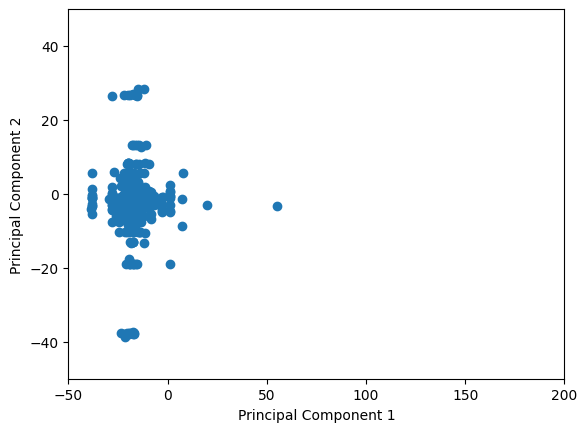

4 -----------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!------------------------------------------------------------
HEAD tanh x 
    Princ. Comp1  Princ. Comp2  Princ. Comp3
0      1.614611      0.318459     -0.070431
1     -1.111508     -0.142899     -0.334316
2      0.711914      1.326095      1.118924
3     -1.237425     -0.528282     -0.046706
4      0.814848     -1.378761      0.844096

 TAIL tanh x 
      Princ. Comp1  Princ. Comp2  Princ. Comp3
763      0.703733     -0.096681     -1.790097
764     -0.421568     -0.512076     -0.136380
765     -0.291285      0.044571     -0.424997
766      0.343394      0.902665      1.145589
767     -1.090424     -0.521007     -0.263769


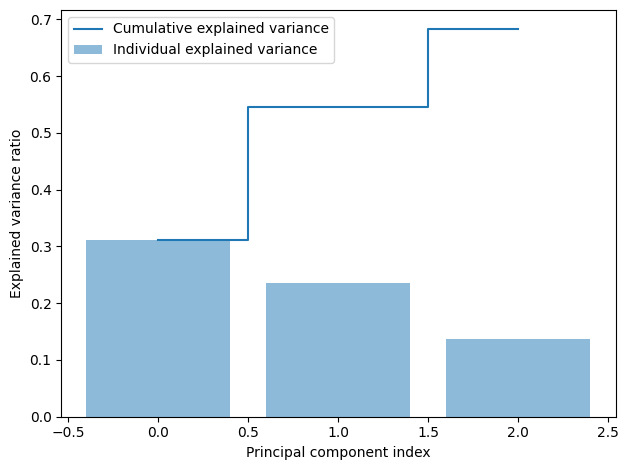

Orthogonality (0.0 means perfect orthogonality) =  -1.8166156337799781

-------------------------THE COMPONENTS START HERE .T
 [[ 0.34794313  0.35489854 -0.27208311]
 [ 0.42208746 -0.04168905  0.24371514]
 [ 0.23548007  0.01540561 -0.1734428 ]
 [ 0.18355278 -0.52889558 -0.27408815]
 [ 0.1604066  -0.37869266 -0.04216471]
 [ 0.30533609 -0.26976046 -0.07041098]
 [ 0.4076827   0.32682049 -0.21051728]
 [ 0.54019526 -0.0047431   0.36475529]] 
-------------------------THE COMPONENTS FINISH HERE-----------------------



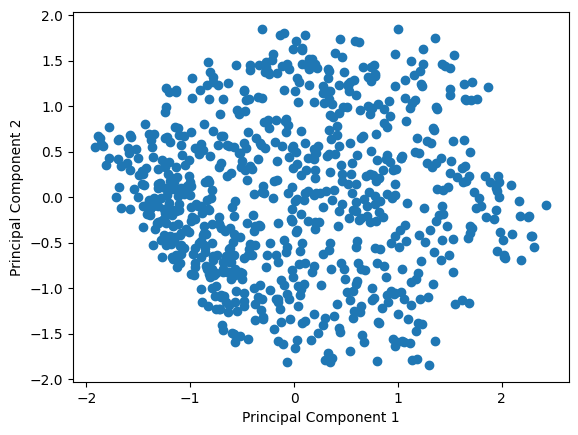

5 -----------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!------------------------------------------------------------
HEAD log x 
    Princ. Comp1  Princ. Comp2  Princ. Comp3
0     -0.210008     -0.492133      0.351197
1     -0.848784     -2.145170     -0.169795
2      0.897882     -1.079150      0.175695
3     -0.860884      2.292034     -1.537528
4      0.489678     -0.167672      0.210253

 TAIL tanh x 
     Princ. Comp1  Princ. Comp2  Princ. Comp3
19      0.240641      0.075519     -0.339477
20     -0.494723     -0.666728      1.025742
21     -0.168117      0.362854     -1.089416
22     -0.381325     -0.894180      1.332591
23     -0.699155      0.685281      0.788442


/tmp/ipykernel_26/1628980663.py:159: RuntimeWarning: invalid value encountered in log
  principalComponents = pca_descrip.fit_transform(pd.DataFrame(np.log(x)).dropna())


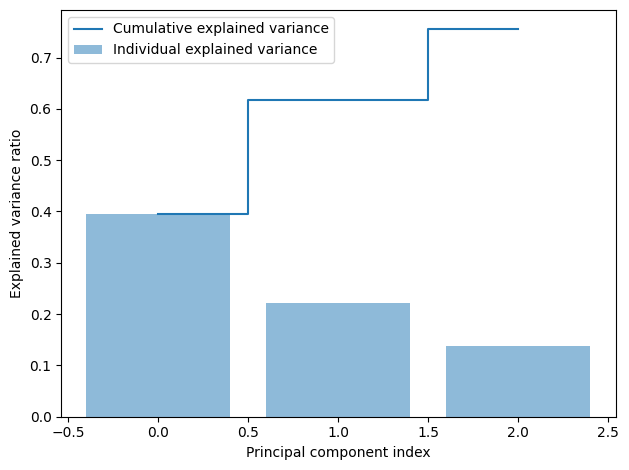

Orthogonality (0.0 means perfect orthogonality) =  1.174330334847968

-------------------------THE COMPONENTS START HERE .T
 [[-0.30051444  0.13132603 -0.24707396]
 [ 0.01587211 -0.20681744 -0.03730036]
 [ 0.18115337 -0.73364993  0.5685183 ]
 [-0.24724962  0.39357806  0.52526725]
 [ 0.05827302 -0.56519969 -0.06457641]
 [-1.48608264 -0.25431748 -0.01439633]
 [ 0.15427585 -0.46694098 -0.41746778]
 [ 0.          0.          0.        ]] 
-------------------------THE COMPONENTS FINISH HERE-----------------------



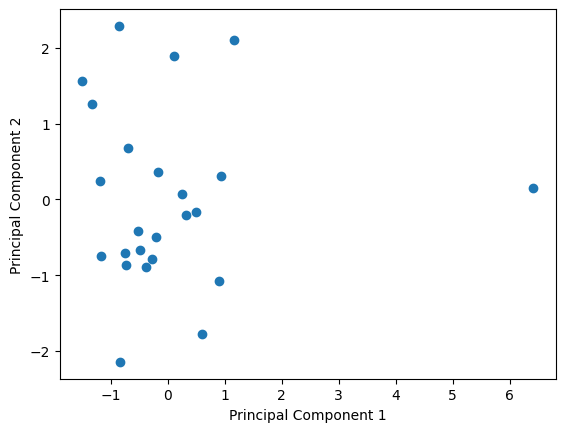

In [7]:
# With 3 components
print ("0 ------------------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!-----------------------------------------------")
pca_descrip = PCA(n_components=3)
principalComponents = pca_descrip.fit_transform(x)
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2","Princ. Comp3"])
print ("HEAD -- x \n",principal_Df.head())
print ("\n TAIL -- x \n",principal_Df.tail())

#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca_descrip.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot( principalComponents [0].T , principalComponents [1] ))
# THE COMPONENTS HERE
print ("Variables: ", descrip.columns)
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.show()

print ("1---------------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!-----------------------------------------------------")
principalComponents = pca_descrip.fit_transform(x*x)
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2","Princ. Comp3"])

print ("HEAD -- x*x \n",principal_Df.head())
print ("\n TAIL -- x*x  \n",principal_Df.tail())

print ("Orthogonality (0.0 means perfect orthogonality) = ",np.dot(principalComponents [0].T , principalComponents [1] ))

exp_var_pca = pca_descrip.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# THE COMPONENTS HERE
print ("Variables: ", descrip.columns)
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.show()



print ("2 -------------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!-----------------------------------------------------")
principalComponents = pca_descrip.fit_transform(np.sqrt(abs(x)))
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2","Princ. Comp3"])


print ("HEAD -- sqrt x \n",principal_Df.head())
print ("\n TAIL -- sqrt x \n",principal_Df.tail())

exp_var_pca = pca_descrip.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot (principalComponents [0].T , principalComponents [1] ))
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
        "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.show()

print ("3 ---------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!--------------------------------------------------------------")
principalComponents = pca_descrip.fit_transform(1/x)
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2","Princ. Comp3"])

print ("HEAD -- 1/x \n",principal_Df.head())
print ("\n TAIL -- 1/x \n",principal_Df.tail())
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca_descrip.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot( principalComponents [0].T , principalComponents [1] ))
# THE COMPONENTS HERE
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.xlim(-50, 200)
plt.ylim(-50, 50)
plt.show()


print ("4 -----------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!------------------------------------------------------------")
principalComponents = pca_descrip.fit_transform(np.tanh(x))
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2","Princ. Comp3"])


print ("HEAD tanh x \n",principal_Df.head())
print ("\n TAIL tanh x \n",principal_Df.tail())

exp_var_pca = pca_descrip.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot (principalComponents [0].T , principalComponents [1] ))
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.show()

print ("5 -----------------------------!!!!!!!!!!!!!!!!!!!!!!!!!!!------------------------------------------------------------")
principalComponents = pca_descrip.fit_transform(pd.DataFrame(np.log(x)).dropna())
principal_Df = pd.DataFrame(data = principalComponents, columns = ["Princ. Comp1","Princ. Comp2","Princ. Comp3"])


print ("HEAD log x \n",principal_Df.head())
print ("\n TAIL tanh x \n",principal_Df.tail())

exp_var_pca = pca_descrip.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print ("Orthogonality (0.0 means perfect orthogonality) = ", np.dot (principalComponents [0].T , principalComponents [1] ))
print ("\n-------------------------THE COMPONENTS START HERE .T\n", pca_descrip.components_.T * np.sqrt(pca_descrip.explained_variance_), 
            "\n-------------------------THE COMPONENTS FINISH HERE-----------------------\n")

plt.scatter(principal_Df["Princ. Comp1"],principal_Df["Princ. Comp2"])
plt.xlabel ("Principal Component 1")
plt.ylabel ("Principal Component 2")
plt.show()

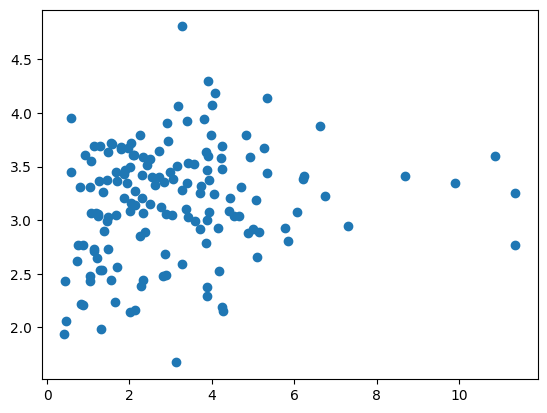

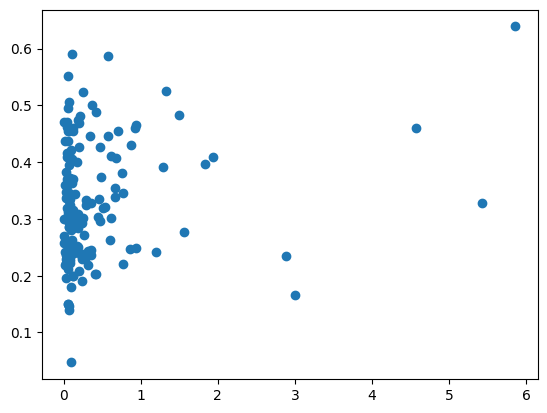

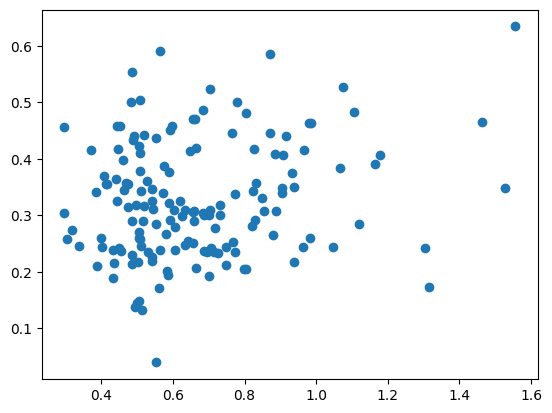

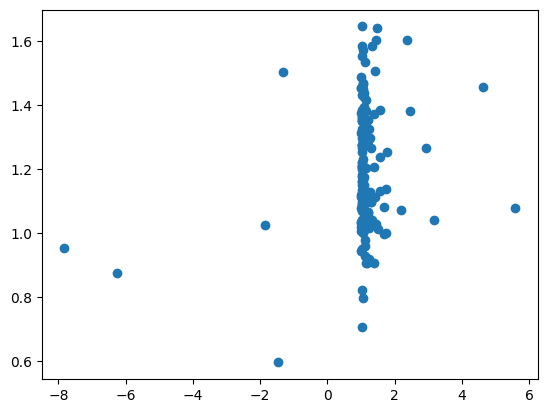

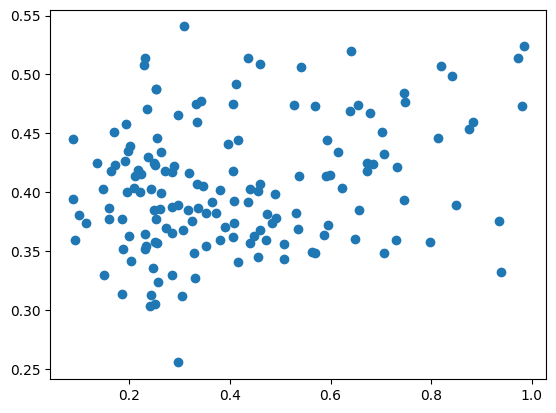

In [8]:
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt


plsn = PLSRegression(n_components=4)
y_train =1/X_train['DiabPedigFunct']
y_test = 1/X_test['DiabPedigFunct']
plsn.fit_transform(X_train[features],y_train)
y_pred = plsn.predict (X_test[features])

plt.scatter(y_test, y_pred)
plt.show()
#----------------------------------------------------------


y_train1=X_train['DiabPedigFunct']*X_train['DiabPedigFunct']
y_test1 = X_test['DiabPedigFunct']*X_test['DiabPedigFunct']

plsn = PLSRegression(n_components=3)
plsn.fit_transform(X_train[features],y_train1)
y_pred = plsn.predict (X_test[features])

plt.scatter(y_test1, y_pred)
plt.show()

#----------------------------------------------------------
y_train2 = np.sqrt(X_train['DiabPedigFunct'])
y_train2 =pd.DataFrame (y_train1,columns=['DiabPedigFunct'])
y_test2 = np.sqrt(X_test['DiabPedigFunct'])
  
plsn = PLSRegression(n_components=6)
plsn.fit_transform(X_train[features],y_train2)
y_pred2 = plsn.predict (X_test[features])

plt.scatter(y_test2, y_pred2)
plt.show()

#----------------------------------------------------------
y_train3 = 1/np.cos(X_train['DiabPedigFunct'])
y_test3 = 1/np.cos(X_test['DiabPedigFunct'])
  
plsn = PLSRegression(n_components=3)
plsn.fit_transform(X_train[features],y_train3)
y_pred3 = plsn.predict (X_test[features])

plt.scatter(y_test3 ,y_pred3)
plt.show()

#----------------------------------------------------------
y_train4 = np.tanh(X_train['DiabPedigFunct'])
y_test4 = np.tanh(X_test['DiabPedigFunct'])
    
plsn = PLSRegression(n_components=6)
plsn.fit_transform(X_train[features],y_train4)

y_pred4 = plsn.predict (X_test[features])

plt.scatter(y_test4, y_pred4)
plt.show()

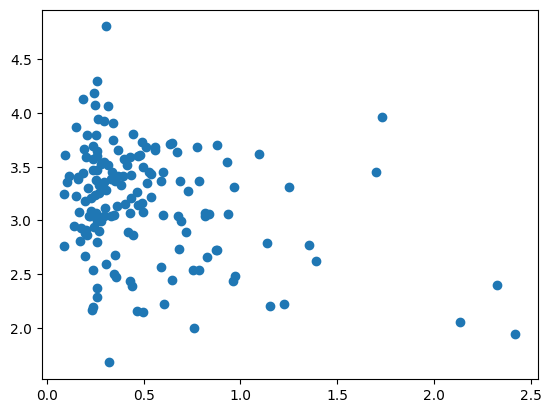

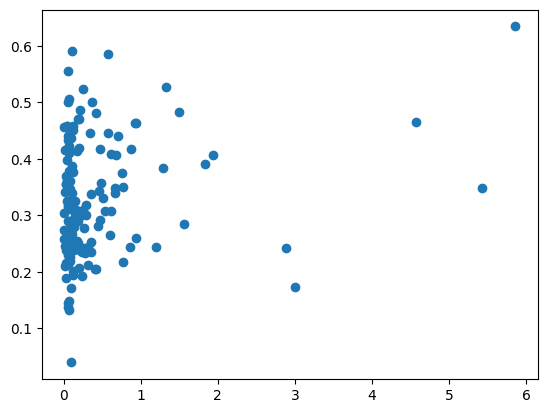

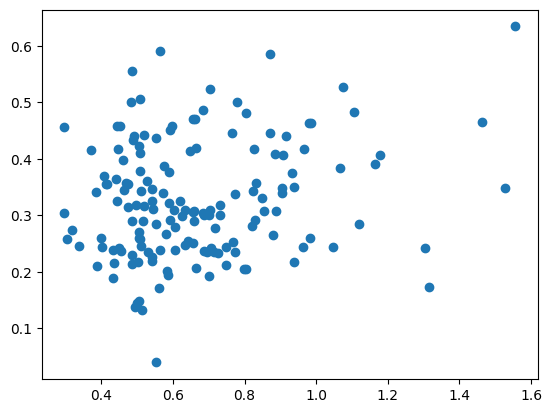

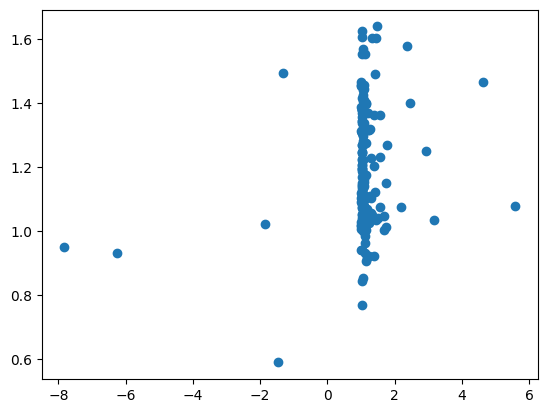

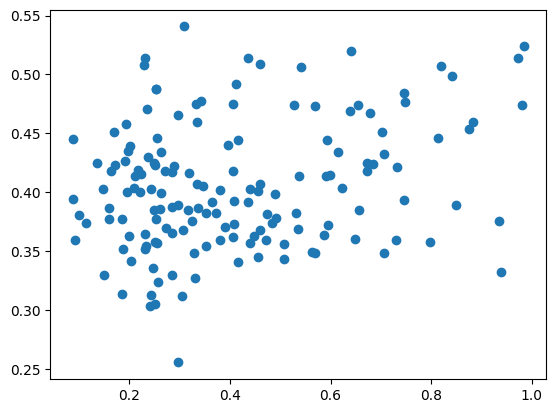

In [9]:
from sklearn.linear_model import LinearRegression

#X_trains = StandardScaler().fit_transform(X_train) 

model = LinearRegression().fit(X_train[features],y_train)
y_pred = model.predict (X_test[features])

plt.scatter(X_test['DiabPedigFunct'], y_pred)
plt.show()

model = LinearRegression().fit(X_train[features], y_train1)
y_pred = model.predict (X_test[features])

plt.scatter(y_test1, y_pred)
plt.show()

model = LinearRegression().fit(X_train[features], y_train2)
y_pred = model.predict (X_test[features])

plt.scatter(y_test2, y_pred)
plt.show()

model = LinearRegression().fit(X_train[features], y_train3)
y_pred = model.predict (X_test[features])

plt.scatter(y_test3, y_pred)
plt.show()

model = LinearRegression().fit(X_train[features], y_train4)
y_pred = model.predict (X_test[features])

plt.scatter(y_test4, y_pred)
plt.show()

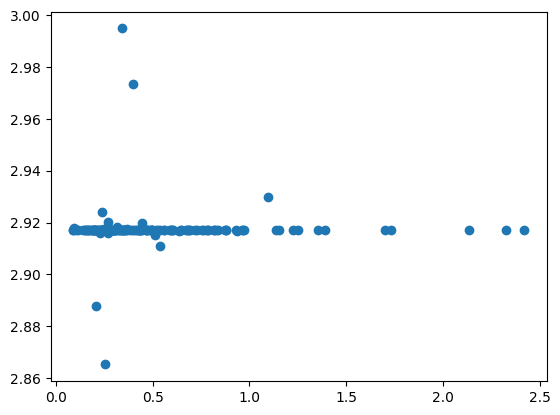

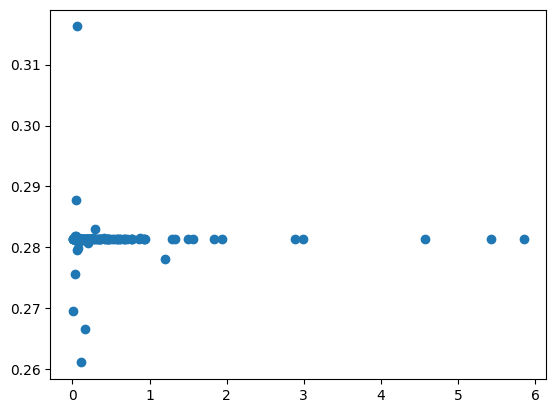

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


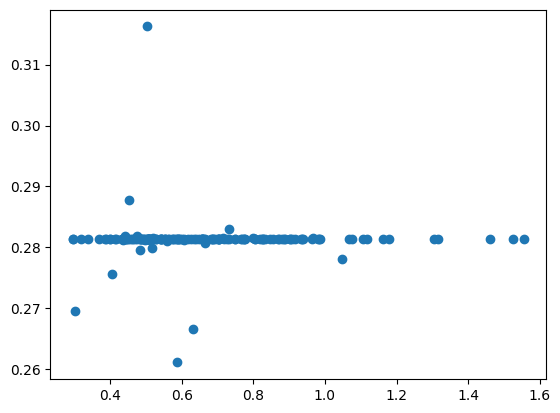

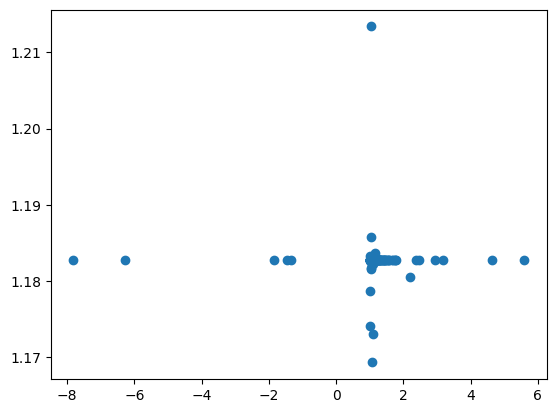

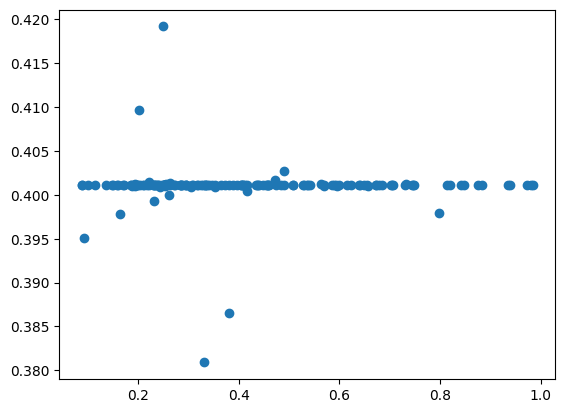

In [10]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import NuSVR 
 
clf = NuSVR(gamma="auto")

# fitting x samples and y classes 
clf.fit(X_train[features], y_train) 
y_pred = clf.predict (X_test[features])

plt.scatter(X_test['DiabPedigFunct'], y_pred)
plt.show()

clf.fit(X_train[features], y_train1) 
y_pred = clf.predict (X_test[features])

plt.scatter(y_test1, y_pred)
plt.show()

clf.fit(X_train[features], y_train2) 
y_pred = clf.predict (X_test[features])

plt.scatter(y_test2, y_pred)
plt.show()

clf.fit(X_train[features], y_train3) 
y_pred = clf.predict (X_test[features])

plt.scatter(y_test3, y_pred)
plt.show()

clf.fit(X_train[features], y_train4) 
y_pred = clf.predict (X_test[features])

plt.scatter(y_test4, y_pred)
plt.show()

In [11]:
# Import PyTorch libraries
import torch
from torch import nn 
import torch.optim as optim
from collections import OrderedDict

# Verify PyTorch version
print (torch.__version__)

# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device)) 
# Print the name of the cuda device, if detected
if device=='cuda':
  print (torch.cuda.get_device_name(device=device))

# Define your PyTorch neural network
# Number of Inputs: 5
# Number of Hidden Units: 100
# Number of Hidden Layers: 2
# Activation Function:  Relu
# Number of Outputs: 1
'''
    The number of hidden neurons should be between the size of the input layer and the output layer.
    The most appropriate number of hidden neurons ~ sqrt(input layer nodes * output layer nodes)
    The number of hidden neurons should keep on decreasing in subsequent layers to get more and 
    more close to pattern and feature extraction and to identify the target class.
'''


print ("Inputs = Len x[0] =", len(x[0]) )
D_in = 8 #features
D_out = 1 #Outputs
H1 = 7
H2 = 6
H3 = 5
H4 = 4
H5 = 3
model = nn.Sequential(OrderedDict([ ('fc1', nn.Linear(D_in, H1)),
                                    ('act1', nn.Sigmoid()),
                                    ('fc2', nn.Linear(H1, H2)),
                                    ('act2', nn.Sigmoid()),
                                    ('fc3', nn.Linear(H2, H3)),
                                    ('act3', nn.Tanh()),
                                    ('fc4', nn.Linear(H3, H4)),
                                    ('act4', nn.ReLU()),
                                    ('fc5', nn.Linear(H4, H5)),
                                    ('act5', nn.ReLU()),
                                    ('fc6', nn.Linear(H5, D_out)) ])).to(device)

'''

            nn.Linear(len(x[0]),100),
            nn.ReLU(),
            nn.Linear(100,1)
        
'''

# Move it to either the CPU or GPU depending on what we have available
model.to(device)

# Measure our neural network by mean square error
criterion = torch.nn.MSELoss()

# Train our network with a simple SGD optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

2.0.0
A cuda device was detected.
Tesla P100-PCIE-16GB
Inputs = Len x[0] = 8


In [12]:
def training (model, x, y, criterion):
# Train our network a using the entire dataset 5 times
    for epoch in range(20):
        totalLoss = 0
        for i in range(len(x)):
           # Single Forward Pass
            ypred = model(x[i].unsqueeze(dim=0))
                      
            # Measure how well the model predicted vs the actual value
            loss = criterion(ypred, y[i])

            # Track how well the model predicted (called loss)
            totalLoss+=loss.item()

            # Update the neural network
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Print out our loss after each training iteration
        print ("Total Loss: ", totalLoss)


In [13]:
# Plot predictions vs. true values
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):
    model.eval()                               # Set the model to inference mode

    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):
        # Single forward pass
        pred = model(x[i])                               
        
        # Un-normalize our prediction
        #pred = pred*numSoldStd+numSoldMean
        #act = y[i]*numSoldStd+numSoldMean
        act=y[i]
        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Diabetes Pedigree Function')
    plt.ylabel('Predicted Diabetes Pedigree Function')
    #plt.plot([minValue,maxValue], [minValue,maxValue])
    #plt.plot(actual, predictions)
    #plt.xlim(minValue, maxValue)
    #plt.ylim(minValue, maxValue)

    # Make the display equal in both dimensions
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.show()



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   Age  \
0            6.0    148.0           72.0           35.0      0.0  33.6  50.0   
1            1.0     85.0           66.0           29.0      0.0  26.6  31.0   
2            8.0    183.0           64.0            0.0      0.0  23.3  32.0   
3            1.0     89.0           66.0           23.0     94.0  28.1  21.0   
4            0.0    137.0           40.0           35.0    168.0  43.1  33.0   
..           ...      ...            ...            ...      ...   ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9  63.0   
764          2.0    122.0           70.0           27.0      0.0  36.8  27.0   
765          5.0    121.0           72.0           23.0    112.0  26.2  30.0   
766          1.0    126.0           60.0            0.0      0.0  30.1  47.0   
767          1.0     93.0           70.0           31.0      0.0  30.4  23.0   

     Outcome  
0        1.0  
1        

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Total Loss:  3015.016966855186
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131
Total Loss:  2886.114629918131


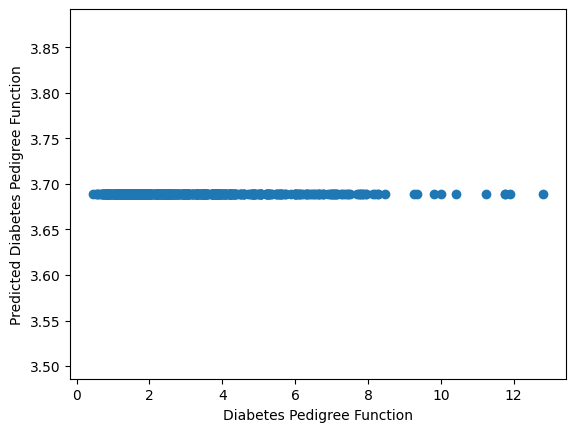


 Y's 

tensor([[0.0369],
        [0.0400],
        [0.2144],
        [0.0686],
        [1.3971]], device='cuda:0')
torch.Size([614, 1])
Total Loss:  241.29547004162055
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362


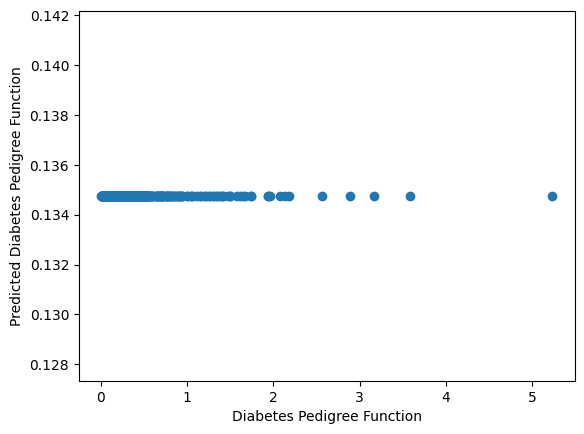


 Y's 

tensor([[0.0369],
        [0.0400],
        [0.2144],
        [0.0686],
        [1.3971]], device='cuda:0')
torch.Size([614, 1])
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362
Total Loss:  154.23049842815362


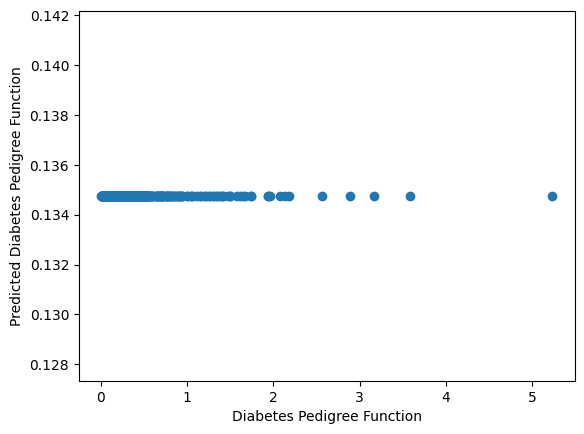


 Y's 

tensor([[1.0187],
        [1.0203],
        [1.1177],
        [1.0353],
        [2.6380]], device='cuda:0')
torch.Size([614, 1])
Total Loss:  1924.0095475353628
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203
Total Loss:  1927.1867121401203


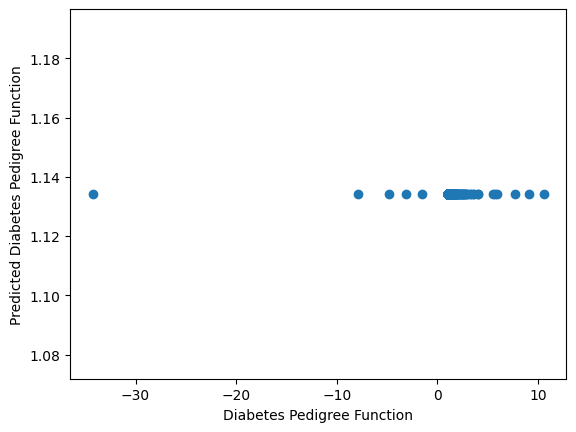


 Y's 

tensor([[0.1897],
        [0.1974],
        [0.4325],
        [0.2562],
        [0.8281]], device='cuda:0')
torch.Size([614, 1])
Total Loss:  32.78667418932412
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026
Total Loss:  28.883260536977026


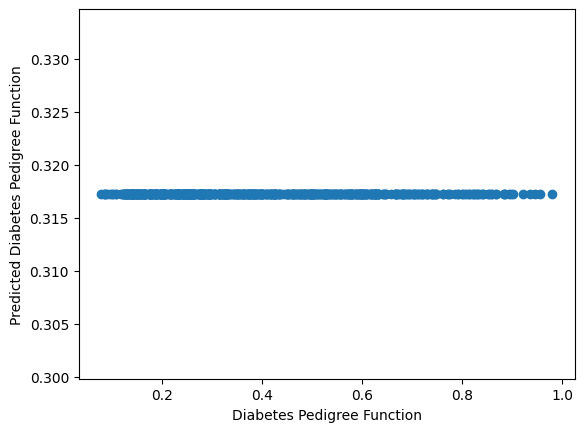

In [14]:
#print (descrip)
#print (features)
print (descrip[features])
#X_trains = StandardScaler().fit(descrip[features]) 
# Create our PyTorch tensors and move to CPU or GPU if available
# Extract the inputs and create a PyTorch tensor x (inputs)
x = torch.tensor(X_train[features].values,dtype=torch.float, device=device)

# Explore the first 5 inputs
print("X's \n")
print (x[:-5])
print (x.shape)
print ("Len x =", len(x) )

# Extract the outputs and create a PyTorch tensor y (outputs)
#y = torch.tensor(descrip['DiabPedigFunct'].values,dtype=torch.float, device=device)
#y_trains = StandardScaler().transform(descrip['DiabPedigFunct'])
y = torch.tensor(y_train.values.reshape(-1,1),dtype=torch.float, device=device)
print("\n Y's \n")
# Explore the first 5 outputs
print (y[:5])
print (y.shape)
training (model, x,y, criterion)
graphPredictions(model, x, y, 0, 300)

# Extract the outputs and create a PyTorch tensor y (outputs)
#y = torch.tensor(descrip['DiabPedigFunct'].values,dtype=torch.float, device=device)
#y_trains = StandardScaler().transform(descrip['DiabPedigFunct'])
y = torch.tensor(y_train1.values.reshape(-1,1),dtype=torch.float, device=device)
print("\n Y's \n")
# Explore the first 5 outputs
print (y[:5])
print (y.shape)
training (model, x,y, criterion)
graphPredictions(model, x, y, 0, 300)

# Extract the outputs and create a PyTorch tensor y (outputs)
#y = torch.tensor(descrip['DiabPedigFunct'].values,dtype=torch.float, device=device)
#y_trains = StandardScaler().transform(descrip['DiabPedigFunct'])
y = torch.tensor(y_train2.values.reshape(-1,1),dtype=torch.float, device=device)
print("\n Y's \n")
# Explore the first 5 outputs
print (y[:5])
print (y.shape)
training (model, x,y, criterion)
graphPredictions(model, x, y, 0, 300)

# Extract the outputs and create a PyTorch tensor y (outputs)
#y = torch.tensor(descrip['DiabPedigFunct'].values,dtype=torch.float, device=device)
#y_trains = StandardScaler().transform(descrip['DiabPedigFunct'])
y = torch.tensor(y_train3.values.reshape(-1,1),dtype=torch.float, device=device)
print("\n Y's \n")
# Explore the first 5 outputs
print (y[:5])
print (y.shape)
training (model, x,y, criterion)
graphPredictions(model, x, y, 0, 300)

# Extract the outputs and create a PyTorch tensor y (outputs)
#y = torch.tensor(descrip['DiabPedigFunct'].values,dtype=torch.float, device=device)
#y_trains = StandardScaler().transform(descrip['DiabPedigFunct'])
y = torch.tensor(y_train4.values.reshape(-1,1),dtype=torch.float, device=device)
print("\n Y's \n")
# Explore the first 5 outputs
print (y[:5])
print (y.shape)
training (model, x,y, criterion)
graphPredictions(model, x, y, 0, 300)

In [15]:
'''
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Diabetes Descriptors",fontsize=20)
# targets = []  # Whichcategories to plot? 
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = descrip['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
'''



'\nplt.figure()\nplt.figure(figsize=(10,10))\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=14)\nplt.xlabel(\'Principal Component - 1\',fontsize=20)\nplt.ylabel(\'Principal Component - 2\',fontsize=20)\nplt.title("Principal Component Analysis of Diabetes Descriptors",fontsize=20)\n# targets = []  # Whichcategories to plot? \ncolors = [\'r\', \'g\']\nfor target, color in zip(targets,colors):\n    indicesToKeep = descrip[\'label\'] == target\n    plt.scatter(principal_breast_Df.loc[indicesToKeep, \'principal component 1\']\n               , principal_breast_Df.loc[indicesToKeep, \'principal component 2\'], c = color, s = 50)\n\nplt.legend(targets,prop={\'size\': 15})\n'

In [16]:
'''
import oracledb

un = 'g.glez.a'
#cs = '/kaggle/input/m-skill/MeriSkill.db'
cp = oracledb.ConnectParams(host="localhost/kaggle/input/m-skill", port=1521, service_name="orclpdb")
dsn = cp.get_connect_string()
print (dsn)
pw = getpass.getpass(f'Enter password for {un}@{dsn}: ')
#with oracledb.connect(user=un, password=pw, dsn=cs)
 
with oracledb.connect(host = 'localhost', database = '/kaggle/input/m-skill/Meriskill.db',
                        user ='root', password = 'pass') as connection:
#connect(user= un, password=pw, config_dir="/kaggle/input/tnsname") as connection:
    with connection.cursor() as cursor:
        sql = """SELECT DISTINCT Pregnancies, Glucose, BloodPressure, SkinThickness, 
                    Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
                FROM Task2
                WHERE Pregnancies IS NOT NULL
                   AND Glucose IS NOT NULL
                   AND BloodPressure IS NOT NULL
                   AND SkinThickness IS NOT NULL
                   AND Insulin IS NOT NULL
                   AND BMI IS NOT NULL
                   AND  DiabetesPedigreeFunction IS NOT NULL
                   AND Outcome IS NOT NULL;"""
    for r in cursor.execute(sql):
            print(r)
'''


'\nimport oracledb\n\nun = \'g.glez.a\'\n#cs = \'/kaggle/input/m-skill/MeriSkill.db\'\ncp = oracledb.ConnectParams(host="localhost/kaggle/input/m-skill", port=1521, service_name="orclpdb")\ndsn = cp.get_connect_string()\nprint (dsn)\npw = getpass.getpass(f\'Enter password for {un}@{dsn}: \')\n#with oracledb.connect(user=un, password=pw, dsn=cs)\n \nwith oracledb.connect(host = \'localhost\', database = \'/kaggle/input/m-skill/Meriskill.db\',\n                        user =\'root\', password = \'pass\') as connection:\n#connect(user= un, password=pw, config_dir="/kaggle/input/tnsname") as connection:\n    with connection.cursor() as cursor:\n        sql = """SELECT DISTINCT Pregnancies, Glucose, BloodPressure, SkinThickness, \n                    Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome\n                FROM Task2\n                WHERE Pregnancies IS NOT NULL\n                   AND Glucose IS NOT NULL\n                   AND BloodPressure IS NOT NULL\n                   AN

In [17]:
'''
   CREATE DATABASE testdb
   USER SYS IDENTIFIED BY sys_password
   USER SYSTEM IDENTIFIED BY system_password
   LOGFILE GROUP 1 ('/u01/logs/my/redo01a.log','/u02/logs/my/redo01b.log') SIZE 100M,
           GROUP 2 ('/u01/logs/my/redo02a.log','/u02/logs/my/redo02b.log') SIZE 100M,
           GROUP 3 ('/u01/logs/my/redo03a.log','/u02/logs/my/redo03b.log') SIZE 100M
   MAXLOGHISTORY 1
   MAXLOGFILES 16
   MAXLOGMEMBERS 3
   MAXDATAFILES 1024
   CHARACTER SET AL32UTF8
   NATIONAL CHARACTER SET AL16UTF16
   EXTENT MANAGEMENT LOCAL
   DATAFILE '/u01/app/oracle/oradata/mynewdb/system01.dbf'
     SIZE 700M REUSE AUTOEXTEND ON NEXT 10240K MAXSIZE UNLIMITED
   SYSAUX DATAFILE '/u01/app/oracle/oradata/mynewdb/sysaux01.dbf'
     SIZE 550M REUSE AUTOEXTEND ON NEXT 10240K MAXSIZE UNLIMITED
   DEFAULT TABLESPACE users
      DATAFILE '/u01/app/oracle/oradata/mynewdb/users01.dbf'
      SIZE 500M REUSE AUTOEXTEND ON MAXSIZE UNLIMITED
   DEFAULT TEMPORARY TABLESPACE tempts1
      TEMPFILE '/u01/app/oracle/oradata/mynewdb/temp01.dbf'
      SIZE 20M REUSE AUTOEXTEND ON NEXT 640K MAXSIZE UNLIMITED
   UNDO TABLESPACE undotbs1
      DATAFILE '/u01/app/oracle/oradata/mynewdb/undotbs01.dbf'
      SIZE 200M REUSE AUTOEXTEND ON NEXT 5120K MAXSIZE UNLIMITED
   USER_DATA TABLESPACE usertbs
      DATAFILE '/u01/app/oracle/oradata/mynewdb/usertbs01.dbf'
      SIZE 200M REUSE AUTOEXTEND ON MAXSIZE UNLIMITED;
'''

"\n   CREATE DATABASE testdb\n   USER SYS IDENTIFIED BY sys_password\n   USER SYSTEM IDENTIFIED BY system_password\n   LOGFILE GROUP 1 ('/u01/logs/my/redo01a.log','/u02/logs/my/redo01b.log') SIZE 100M,\n           GROUP 2 ('/u01/logs/my/redo02a.log','/u02/logs/my/redo02b.log') SIZE 100M,\n           GROUP 3 ('/u01/logs/my/redo03a.log','/u02/logs/my/redo03b.log') SIZE 100M\n   MAXLOGHISTORY 1\n   MAXLOGFILES 16\n   MAXLOGMEMBERS 3\n   MAXDATAFILES 1024\n   CHARACTER SET AL32UTF8\n   NATIONAL CHARACTER SET AL16UTF16\n   EXTENT MANAGEMENT LOCAL\n   DATAFILE '/u01/app/oracle/oradata/mynewdb/system01.dbf'\n     SIZE 700M REUSE AUTOEXTEND ON NEXT 10240K MAXSIZE UNLIMITED\n   SYSAUX DATAFILE '/u01/app/oracle/oradata/mynewdb/sysaux01.dbf'\n     SIZE 550M REUSE AUTOEXTEND ON NEXT 10240K MAXSIZE UNLIMITED\n   DEFAULT TABLESPACE users\n      DATAFILE '/u01/app/oracle/oradata/mynewdb/users01.dbf'\n      SIZE 500M REUSE AUTOEXTEND ON MAXSIZE UNLIMITED\n   DEFAULT TEMPORARY TABLESPACE tempts1\n     

In [18]:
'''
ABASE statement is one of the most popular ways to create a database among the developers that work with Oracle.

The CREATE DATABASE statement will look somehow like this:

CREATE DATABASE testdb
   USER SYS IDENTIFIED BY sys_password
   USER SYSTEM IDENTIFIED BY system_password
   LOGFILE GROUP 1 ('/u01/logs/my/redo01a.log','/u02/logs/my/redo01b.log') SIZE 100M,
           GROUP 2 ('/u01/logs/my/redo02a.log','/u02/logs/my/redo02b.log') SIZE 100M,
           GROUP 3 ('/u01/logs/my/redo03a.log','/u02/logs/my/redo03b.log') SIZE 100M
   MAXLOGHISTORY 1
   MAXLOGFILES 16
   MAXLOGMEMBERS 3
   MAXDATAFILES 1024
   CHARACTER SET AL32UTF8
   NATIONAL CHARACTER SET AL16UTF16
   EXTENT MANAGEMENT LOCAL
   DATAFILE '/u01/app/oracle/oradata/mynewdb/system01.dbf'
     SIZE 700M REUSE AUTOEXTEND ON NEXT 10240K MAXSIZE UNLIMITED
   SYSAUX DATAFILE '/u01/app/oracle/oradata/mynewdb/sysaux01.dbf'
     SIZE 550M REUSE AUTOEXTEND ON NEXT 10240K MAXSIZE UNLIMITED
   DEFAULT TABLESPACE users
      DATAFILE '/u01/app/oracle/oradata/mynewdb/users01.dbf'
      SIZE 500M REUSE AUTOEXTEND ON MAXSIZE UNLIMITED
   DEFAULT TEMPORARY TABLESPACE tempts1
      TEMPFILE '/u01/app/oracle/oradata/mynewdb/temp01.dbf'
      SIZE 20M REUSE AUTOEXTEND ON NEXT 640K MAXSIZE UNLIMITED
   UNDO TABLESPACE undotbs1
      DATAFILE '/u01/app/oracle/oradata/mynewdb/undotbs01.dbf'
      SIZE 200M REUSE AUTOEXTEND ON NEXT 5120K MAXSIZE UNLIMITED
   USER_DATA TABLESPACE usertbs
      DATAFILE '/u01/app/oracle/oradata/mynewdb/usertbs01.dbf'
      SIZE 200M REUSE AUTOEXTEND ON MAXSIZE UNLIMITED;
'''

"\nABASE statement is one of the most popular ways to create a database among the developers that work with Oracle.\n\nThe CREATE DATABASE statement will look somehow like this:\n\nCREATE DATABASE testdb\n   USER SYS IDENTIFIED BY sys_password\n   USER SYSTEM IDENTIFIED BY system_password\n   LOGFILE GROUP 1 ('/u01/logs/my/redo01a.log','/u02/logs/my/redo01b.log') SIZE 100M,\n           GROUP 2 ('/u01/logs/my/redo02a.log','/u02/logs/my/redo02b.log') SIZE 100M,\n           GROUP 3 ('/u01/logs/my/redo03a.log','/u02/logs/my/redo03b.log') SIZE 100M\n   MAXLOGHISTORY 1\n   MAXLOGFILES 16\n   MAXLOGMEMBERS 3\n   MAXDATAFILES 1024\n   CHARACTER SET AL32UTF8\n   NATIONAL CHARACTER SET AL16UTF16\n   EXTENT MANAGEMENT LOCAL\n   DATAFILE '/u01/app/oracle/oradata/mynewdb/system01.dbf'\n     SIZE 700M REUSE AUTOEXTEND ON NEXT 10240K MAXSIZE UNLIMITED\n   SYSAUX DATAFILE '/u01/app/oracle/oradata/mynewdb/sysaux01.dbf'\n     SIZE 550M REUSE AUTOEXTEND ON NEXT 10240K MAXSIZE UNLIMITED\n   DEFAULT TABLES